In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
import json
from urllib.request import urlopen

pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 100)

api = 'c4ad87b03bec1878bc0be6156d4472b0'

In [2]:
os.chdir('/Users/brendan/Desktop/Python/BoostedAI/VRRM')
os.getcwd()

'/Users/brendan/Desktop/Python/BoostedAI/VRRM'

In [3]:
# Request financial data from API
company = 'VRRM'


income_statement_q = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?period=quarter&limit=400&apikey={api}').json()
balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?period=quarter&limit=400&apikey={api}').json()
cash_flow = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{company}?period=quarter&limit=400&apikey={api}').json()
Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{company}?period=quarter&limit=400&apikey={api}').json()
key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{company}?period=quarter&limit=400&apikey={api}').json()
profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{company}?period=quarter&limit=400&apikey={api}').json()

In [4]:
income_statement_q_df = pd.DataFrame(income_statement_q)
income_statement_q_df.head()
dates = income_statement_q_df['date']

In [5]:
millions = 1000000
dates

0     2022-06-30
1     2022-03-31
2     2021-12-31
3     2021-09-30
4     2021-06-30
5     2021-03-31
6     2020-12-31
7     2020-09-30
8     2020-06-30
9     2020-03-31
10    2019-12-31
11    2019-09-30
12    2019-06-30
13    2019-03-31
14    2018-12-31
15    2018-09-30
16    2018-06-30
17    2018-03-31
18    2017-12-31
19    2017-09-30
20    2017-06-30
21    2017-03-31
Name: date, dtype: object

In [6]:
def quarterly_data(ticker):
    income_statement_q = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=quarter&limit=400&apikey={api}').json()
    balance_sheet = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period=quarter&limit=400&apikey={api}').json()
    cash_flow = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{ticker}?period=quarter&limit=400&apikey={api}').json()
    Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{ticker}?period=quarter&limit=400&apikey={api}').json()
    key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{ticker}?period=quarter&limit=400&apikey={api}').json()
    profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{ticker}?period=quarter&limit=400&apikey={api}').json()
    
    millions = 1000000
    
    financials = {}
    length = min([len(income_statement_q), len(balance_sheet), len(cash_flow), len(Ratios), len(key_Metrics)])
    for item in range(length): # 10 years
        financials[dates[item]]={}
        financials[dates[item]]['Calendar_Year'] = income_statement_q[item]['calendarYear']
        financials[dates[item]]['Quarter'] = income_statement_q[item]['period']
        financials[dates[item]]['Mkt Cap'] = key_Metrics[item]['marketCap'] /millions
        financials[dates[item]]['Debt to Equity'] = key_Metrics[item]['debtToEquity']
        financials[dates[item]]['Debt to Assets'] = key_Metrics[item]['debtToAssets']
        financials[dates[item]]['Revenue per Share'] = key_Metrics[item]['revenuePerShare']
        financials[dates[item]]['NI per Share'] = key_Metrics[item]['netIncomePerShare']
        financials[dates[item]]['outstandingShares'] = income_statement_q[item]['weightedAverageShsOutDil'] / millions
        
    # income statement
        financials[dates[item]]['Revenue'] = income_statement_q[item]['revenue'] / millions
        financials[dates[item]]['Gross Profit'] = income_statement_q[item]['grossProfit'] / millions
        financials[dates[item]]['R&D Expenses'] = income_statement_q[item]['researchAndDevelopmentExpenses']/ millions
        financials[dates[item]]['Op Expenses'] = income_statement_q[item]['operatingExpenses'] / millions
        financials[dates[item]]['Op Income'] = income_statement_q[item]['operatingIncome'] / millions
        financials[dates[item]]['Net Income'] = income_statement_q[item]['netIncome'] / millions
    
    # balance sheet
        financials[dates[item]]['Cash'] = balance_sheet[item]['cashAndCashEquivalents'] / millions
        financials[dates[item]]['Receivables'] = balance_sheet[item]['netReceivables'] / millions
        financials[dates[item]]['Inventory'] = balance_sheet[item]['inventory'] / millions
        financials[dates[item]]['Cur Assets'] = balance_sheet[item]['totalCurrentAssets'] / millions
        financials[dates[item]]['Tax Assets'] = balance_sheet[item]['taxAssets'] / millions
        financials[dates[item]]['LT Assets'] = balance_sheet[item]['totalNonCurrentAssets'] / millions
        financials[dates[item]]['Int Assets'] = balance_sheet[item]['intangibleAssets'] / millions
        financials[dates[item]]['Total Assets'] = balance_sheet[item]['totalAssets'] / millions
        financials[dates[item]]['Payables'] = balance_sheet[item]['accountPayables'] / millions
        financials[dates[item]]['Deferred Revenue Current'] = balance_sheet[item]['deferredRevenue'] / millions
        financials[dates[item]]['Deferred Revenue LongTerm'] = balance_sheet[item]['deferredRevenueNonCurrent'] / millions
        financials[dates[item]]['Cur Liab'] = balance_sheet[item]['totalCurrentLiabilities'] / millions
        financials[dates[item]]['LT Debt'] = balance_sheet[item]['longTermDebt'] / millions
        financials[dates[item]]['LT Liab'] = balance_sheet[item]['totalNonCurrentLiabilities'] / millions
        financials[dates[item]]['Total Liab'] = balance_sheet[item]['totalLiabilities'] / millions
        financials[dates[item]]['SH Equity'] = balance_sheet[item]['totalStockholdersEquity'] / millions
    
    # cash flow
        financials[dates[item]]['cash_flow Operations'] = cash_flow[item]['netCashProvidedByOperatingActivities'] / millions
        financials[dates[item]]['cash_flow Investing'] = cash_flow[item]['netCashUsedForInvestingActivites'] / millions
        financials[dates[item]]['cash_flow Financing'] = cash_flow[item]['netCashUsedProvidedByFinancingActivities'] / millions
        financials[dates[item]]['CAPEX'] = cash_flow[item]['capitalExpenditure'] / millions
        financials[dates[item]]['Fcash_flow'] = cash_flow[item]['freeCashFlow'] / millions
        financials[dates[item]]['Dividends Paid'] = cash_flow[item]['dividendsPaid'] / millions
    
    # income statement ratios
        financials[dates[item]]['Gross Profit Margin'] = Ratios[item]['grossProfitMargin']
        financials[dates[item]]['Op Margin'] = Ratios[item]['operatingProfitMargin']
        financials[dates[item]]['Int Coverage'] = Ratios[item]['interestCoverage']
        financials[dates[item]]['Net Profit Margin'] = Ratios[item]['netProfitMargin']
        financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']
    
    # balance sheet ratios
        financials[dates[item]]['Current Ratio'] = Ratios[item]['currentRatio']
        financials[dates[item]]['Operating Cycle'] = Ratios[item]['operatingCycle']
        financials[dates[item]]['Days of AP Outstanding'] = Ratios[item]['daysOfPayablesOutstanding']
        financials[dates[item]]['Cash Conversion Cycle'] = Ratios[item]['cashConversionCycle']

    # return ratios
        financials[dates[item]]['ROA'] = Ratios[item]['returnOnAssets']
        financials[dates[item]]['ROE'] = Ratios[item]['returnOnEquity']
        financials[dates[item]]['ROCE'] = Ratios[item]['returnOnCapitalEmployed']
        financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']
    
    # Valuation/Price ratios
        financials[dates[item]]['PE'] = Ratios[item]['priceEarningsRatio']
        financials[dates[item]]['PS'] = Ratios[item]['priceToSalesRatio']
        financials[dates[item]]['PB'] = Ratios[item]['priceToBookRatio']
        financials[dates[item]]['Price To FCF'] = Ratios[item]['priceToFreeCashFlowsRatio']
        financials[dates[item]]['PEG'] = Ratios[item]['priceEarningsToGrowthRatio']
        financials[dates[item]]['EPS'] = income_statement_q[item]['eps']
 
        
    df = pd.DataFrame(financials)
    df = df.T
    df['Ticker'] = ticker
    df.to_csv(f'{ticker}.csv')
    
    
    return df
    

In [7]:
VRRM_df = quarterly_data('VRRM')
VRRM_df.head()

,Calendar_Year,Quarter,Mkt Cap,Debt to Equity,Debt to Assets,Revenue per Share,NI per Share,outstandingShares,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,Cash,Receivables,Inventory,Cur Assets,Tax Assets,LT Assets,Int Assets,Total Assets,Payables,Deferred Revenue Current,Deferred Revenue LongTerm,Cur Liab,LT Debt,LT Liab,Total Liab,SH Equity,cash_flow Operations,cash_flow Investing,cash_flow Financing,CAPEX,Fcash_flow,Dividends Paid,Gross Profit Margin,Op Margin,Int Coverage,Net Profit Margin,Dividend Yield,Current Ratio,Operating Cycle,Days of AP Outstanding,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,Price To FCF,PEG,EPS,Ticker
2022-06-30,2022,Q2,"2,430.24",5.08,0.86,1.21,0.19,160.34,187.49,183.77,0.00,55.20,45.16,29.64,86.39,172.82,16.55,348.37,0.00,"1,431.49",429.81,"1,779.86",69.11,29.74,0.00,165.50,"1,239.52","1,370.13","1,535.64",244.22,65.13,-11.43,-57.87,-11.25,53.88,0.00,0.98,0.24,3.12,0.16,None,2.10,484.09,"1,675.10","-1,191.00",0.02,0.12,0.03,20.50,12.96,9.95,45.10,0.10,0.19,VRRM
2022-03-31,2022,Q1,"2,594.35",4.50,0.85,1.07,0.06,165.43,170.38,166.61,0.00,51.06,32.01,10.04,93.38,171.91,15.45,362.98,0.00,"1,461.51",460.08,"1,824.48",63.05,27.37,0.00,154.15,"1,242.13","1,394.53","1,548.67",275.81,31.25,-11.48,-28.65,-11.48,19.77,0.00,0.98,0.19,2.24,0.06,None,2.35,458.78,"1,501.56","-1,042.78",0.01,0.04,0.02,64.60,15.23,9.41,131.23,-1.36,0.06,VRRM
2021-12-31,2021,Q4,"2,458.89",4.78,0.86,1.07,0.12,165.43,169.98,154.02,0.00,48.13,36.73,19.07,101.28,160.98,12.09,348.07,0.00,"1,488.99",487.30,"1,837.06",67.56,27.14,0.00,175.19,"1,241.79","1,401.90","1,577.09",259.96,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.22,2.95,0.11,None,1.99,153.43,380.95,-227.53,0.01,0.07,0.02,32.24,14.47,9.46,None,-1.10,0.12,VRRM
2021-09-30,2021,Q3,"2,401.53",4.09,0.84,1.02,0.17,165.43,162.09,151.29,0.00,109.42,41.87,27.31,128.25,201.88,0.00,372.13,0.00,"1,109.79",317.03,"1,481.92",48.63,2.01,0.00,116.93,996.93,"1,121.32","1,238.25",243.67,91.81,-7.31,-101.69,-7.38,84.43,0.00,0.93,0.26,3.60,0.17,None,3.18,112.09,405.15,-293.06,0.02,0.11,0.03,21.99,14.82,9.86,28.44,0.03,0.17,VRRM
2021-06-30,2021,Q2,"2,495.75",3.16,0.80,0.79,0.02,166.03,128.66,121.18,0.00,89.67,31.51,3.99,147.35,238.80,0.00,421.56,0.00,"1,137.63",340.64,"1,559.19",47.40,2.90,0.00,106.74,998.79,"1,136.02","1,242.77",316.43,28.46,-111.45,-16.89,-4.55,23.91,0.00,0.94,0.24,2.70,0.03,None,3.95,167.05,570.66,-403.62,0.00,0.01,0.02,156.30,19.40,7.89,104.37,1.12,0.02,VRRM


In [8]:
def get_prices(ticker):
    
    
    prices_request = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/{ticker}?apikey={api}').json()
    

    #dates_df = pd.DataFrame.from_dict(prices_request,orient='columns')
    out_file = open(f"{ticker}.json", "w") 
    json.dump(prices_request, out_file, indent = 4) 
    out_file.close() 
    
    with open(f'{ticker}.json','r') as f:
        data = json.loads(f.read())
    # Flatten data
    df_nested_list = pd.json_normalize(data, record_path =['historical'])
    df_nested_list['Ticker'] = ticker
    df_nested_list.to_csv(f"{ticker}.csv")
    return df_nested_list

In [9]:
VRRM_df_prices = get_prices('VRRM')

In [10]:
VRRM_df_prices.tail()

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Ticker
1254,2017-08-25,9.99,10.00,9.97,9.99,9.99,"479,600.00","479,600.00",0.00,0.00,9.99,"August 25, 17",0.00,VRRM
1255,2017-08-24,9.96,9.99,9.96,9.98,9.98,"3,000.00","3,000.00",0.02,0.20,9.98,"August 24, 17",0.00,VRRM
1256,2017-08-23,9.94,10.01,9.93,9.96,9.96,"628,000.00","628,000.00",0.02,0.20,9.96,"August 23, 17",0.00,VRRM
1257,2017-08-22,10.02,10.02,10.02,10.02,10.02,12.00,12.00,0.00,0.00,10.02,"August 22, 17",0.00,VRRM
1258,2017-08-21,10.00,10.02,9.98,10.02,10.02,"1,900.00","1,900.00",0.02,0.20,10.01,"August 21, 17",0.00,VRRM


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
VRRM_df_prices.head()
VRRM_df_prices.columns

Index(['date', 'open', 'high', 'low', 'close', 'adjClose', 'volume',
       'unadjustedVolume', 'change', 'changePercent', 'vwap', 'label',
       'changeOverTime', 'Ticker', 'changePercent_YTD'],
      dtype='object')

In [17]:
VRRM_df_prices['changePercent_YTD'] = VRRM_df_prices['changePercent'].cumsum()
VRRM_df_prices = VRRM_df_prices[::-1]
VRRM_df_prices = VRRM_df_prices.sort_values(by=['date'])
post_covid_df = VRRM_df_prices.copy()
post_covid_df = VRRM_df_prices[VRRM_df_prices['date']>'2020-03-25']
post_covid_df['changePercent_postCovid'] = post_covid_df['changePercent'].cumsum()

<ipython-input-17-c881232815f6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_covid_df['changePercent_postCovid'] = post_covid_df['changePercent'].cumsum()


In [18]:

post_covid_df = post_covid_df[post_covid_df['date']>'2020-04-01']

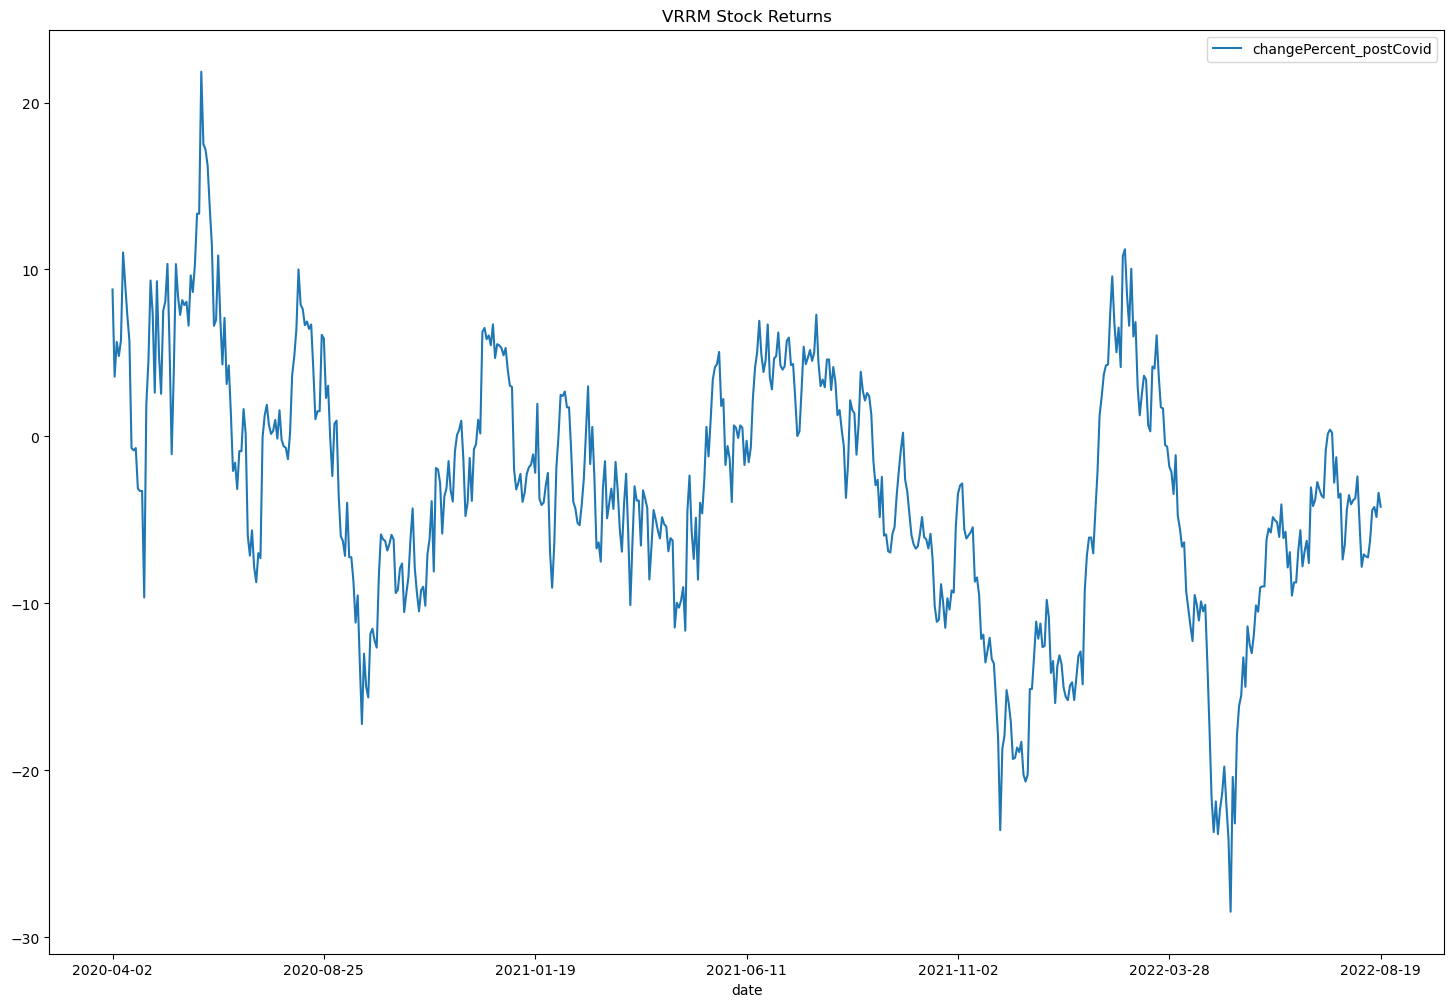

In [19]:
post_covid_df.plot(x='date', y='changePercent_postCovid',figsize=(18,12))
plt.title('VRRM Stock Returns')
plt.show()

In [20]:
VRRM_df.head()

,Calendar_Year,Quarter,Mkt Cap,Debt to Equity,Debt to Assets,Revenue per Share,NI per Share,outstandingShares,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,Net Income,Cash,Receivables,Inventory,Cur Assets,Tax Assets,LT Assets,Int Assets,Total Assets,Payables,Deferred Revenue Current,Deferred Revenue LongTerm,Cur Liab,LT Debt,LT Liab,Total Liab,SH Equity,cash_flow Operations,cash_flow Investing,cash_flow Financing,CAPEX,Fcash_flow,Dividends Paid,Gross Profit Margin,Op Margin,Int Coverage,Net Profit Margin,Dividend Yield,Current Ratio,Operating Cycle,Days of AP Outstanding,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,Price To FCF,PEG,EPS,Ticker
2022-06-30,2022,Q2,"2,430.24",5.08,0.86,1.21,0.19,160.34,187.49,183.77,0.00,55.20,45.16,29.64,86.39,172.82,16.55,348.37,0.00,"1,431.49",429.81,"1,779.86",69.11,29.74,0.00,165.50,"1,239.52","1,370.13","1,535.64",244.22,65.13,-11.43,-57.87,-11.25,53.88,0.00,0.98,0.24,3.12,0.16,None,2.10,484.09,"1,675.10","-1,191.00",0.02,0.12,0.03,20.50,12.96,9.95,45.10,0.10,0.19,VRRM
2022-03-31,2022,Q1,"2,594.35",4.50,0.85,1.07,0.06,165.43,170.38,166.61,0.00,51.06,32.01,10.04,93.38,171.91,15.45,362.98,0.00,"1,461.51",460.08,"1,824.48",63.05,27.37,0.00,154.15,"1,242.13","1,394.53","1,548.67",275.81,31.25,-11.48,-28.65,-11.48,19.77,0.00,0.98,0.19,2.24,0.06,None,2.35,458.78,"1,501.56","-1,042.78",0.01,0.04,0.02,64.60,15.23,9.41,131.23,-1.36,0.06,VRRM
2021-12-31,2021,Q4,"2,458.89",4.78,0.86,1.07,0.12,165.43,169.98,154.02,0.00,48.13,36.73,19.07,101.28,160.98,12.09,348.07,0.00,"1,488.99",487.30,"1,837.06",67.56,27.14,0.00,175.19,"1,241.79","1,401.90","1,577.09",259.96,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.22,2.95,0.11,None,1.99,153.43,380.95,-227.53,0.01,0.07,0.02,32.24,14.47,9.46,None,-1.10,0.12,VRRM
2021-09-30,2021,Q3,"2,401.53",4.09,0.84,1.02,0.17,165.43,162.09,151.29,0.00,109.42,41.87,27.31,128.25,201.88,0.00,372.13,0.00,"1,109.79",317.03,"1,481.92",48.63,2.01,0.00,116.93,996.93,"1,121.32","1,238.25",243.67,91.81,-7.31,-101.69,-7.38,84.43,0.00,0.93,0.26,3.60,0.17,None,3.18,112.09,405.15,-293.06,0.02,0.11,0.03,21.99,14.82,9.86,28.44,0.03,0.17,VRRM
2021-06-30,2021,Q2,"2,495.75",3.16,0.80,0.79,0.02,166.03,128.66,121.18,0.00,89.67,31.51,3.99,147.35,238.80,0.00,421.56,0.00,"1,137.63",340.64,"1,559.19",47.40,2.90,0.00,106.74,998.79,"1,136.02","1,242.77",316.43,28.46,-111.45,-16.89,-4.55,23.91,0.00,0.94,0.24,2.70,0.03,None,3.95,167.05,570.66,-403.62,0.00,0.01,0.02,156.30,19.40,7.89,104.37,1.12,0.02,VRRM
